# Linear Regression Case Study On New Insurance Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\ml\\Linear_Regression\\new_insurance_data.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
df.shape

(1338, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
#so here we have 11 independent features and 1 dependent feature that is charges, we will be predicting the charges 
# with the help of linear regression model

In [7]:
# Checking for Null values

In [8]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [9]:
# here we do have some null values present so either we can remove them or we can add the mean/ median / mode values in
# place of null values as we can only see a few null values present 

In [10]:
col = list(df.columns)

In [11]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

<AxesSubplot:xlabel='bmi', ylabel='Density'>

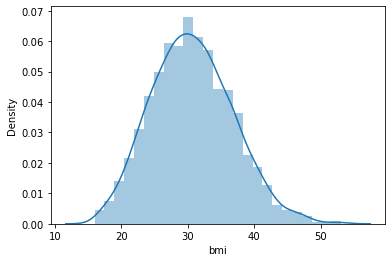

In [12]:
sns.distplot(df["bmi"])

<AxesSubplot:xlabel='children', ylabel='Density'>

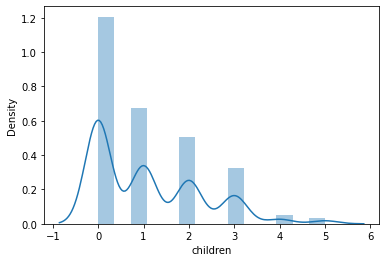

In [13]:
sns.distplot(df["children"])

<AxesSubplot:xlabel='Claim_Amount', ylabel='Density'>

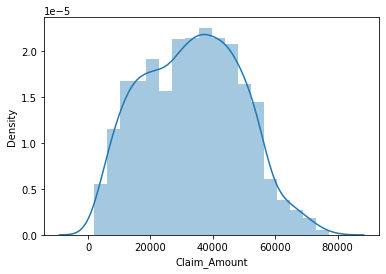

In [14]:
sns.distplot(df["Claim_Amount"])

<AxesSubplot:xlabel='past_consultations', ylabel='Density'>

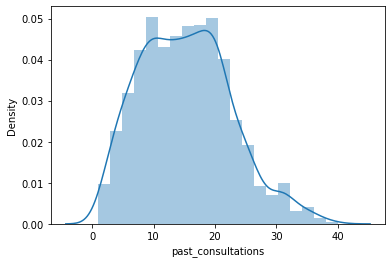

In [15]:
sns.distplot(df["past_consultations"])

<AxesSubplot:xlabel='num_of_steps', ylabel='Density'>

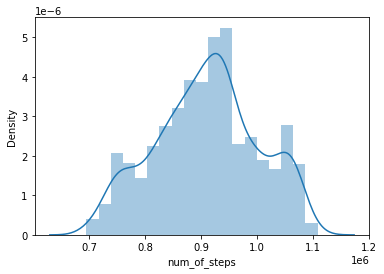

In [16]:
sns.distplot(df["num_of_steps"])

<AxesSubplot:xlabel='Hospital_expenditure', ylabel='Density'>

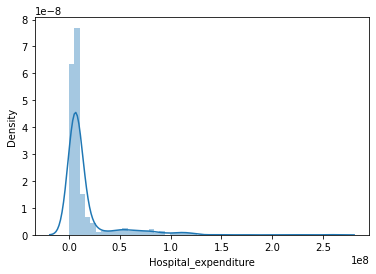

In [17]:
sns.distplot(df["Hospital_expenditure"])

<AxesSubplot:xlabel='NUmber_of_past_hospitalizations', ylabel='Density'>

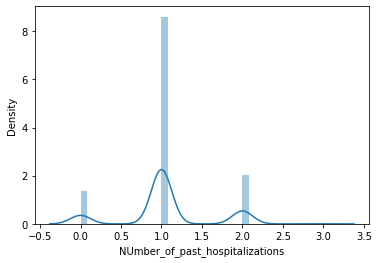

In [18]:
sns.distplot(df["NUmber_of_past_hospitalizations"])

<AxesSubplot:xlabel='Anual_Salary', ylabel='Density'>

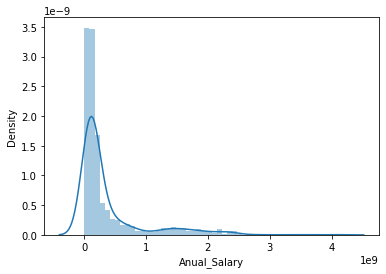

In [19]:
sns.distplot(df["Anual_Salary"])

In [20]:
# From the above graphs we can say our data is not that much skewed so we can go ahead with adding mean value to all
# our missing data for intiger/float data types

In [21]:
df["charges"].mean()

13270.422265141262

In [22]:
for i in col:
    if df[i].dtype == "float64":
        df[i] = df[i].fillna(df[i].mean())
    else:
        df[i] = df[i].fillna(df[i].mode()[0])

In [23]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [24]:
# so now we have cleared all the null values

In [25]:
# As we have a little amount of outliers lets check them

In [26]:
# Checking for Outliers

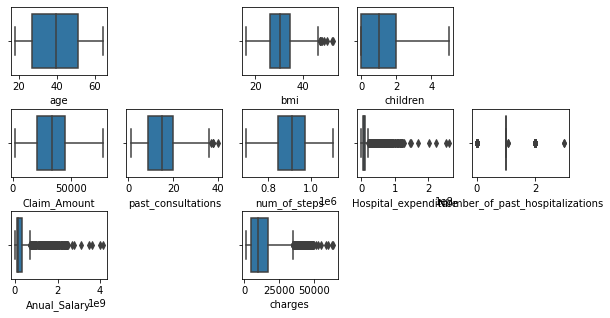

In [27]:
plt.figure(figsize = (10,5))
for p,q in enumerate(col,start = 1):
    if df[q].dtype!= "object":
        plt.subplot(3,5,p)
        sns.boxplot(df[q])
        plt.subplots_adjust(hspace = .5,wspace= .20)
    
    

In [28]:
# From the above graphs we can see that the outliers are present

In [29]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

In [30]:
df1 = df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis = 1)]

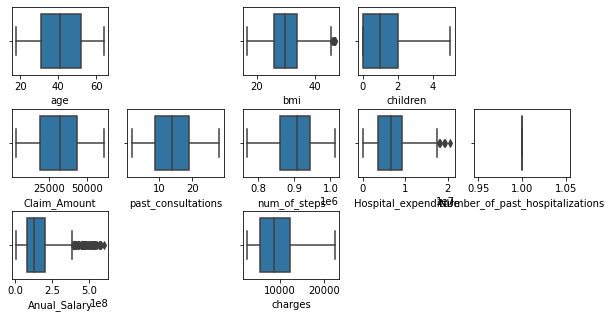

In [31]:
plt.figure(figsize = (10,5))
for p,q in enumerate(col,start = 1):
    if df1[q].dtype!= "object":
        plt.subplot(3,5,p)
        sns.boxplot(df1[q])
        plt.subplots_adjust(hspace = .5,wspace= .20)

In [32]:
# So now we can see that most of our outliers have been handled with but here we will be taking the data
# which contains outliers for our study 

In [33]:
# lets now analyse the data with some visualisaatin toold

<AxesSubplot:>

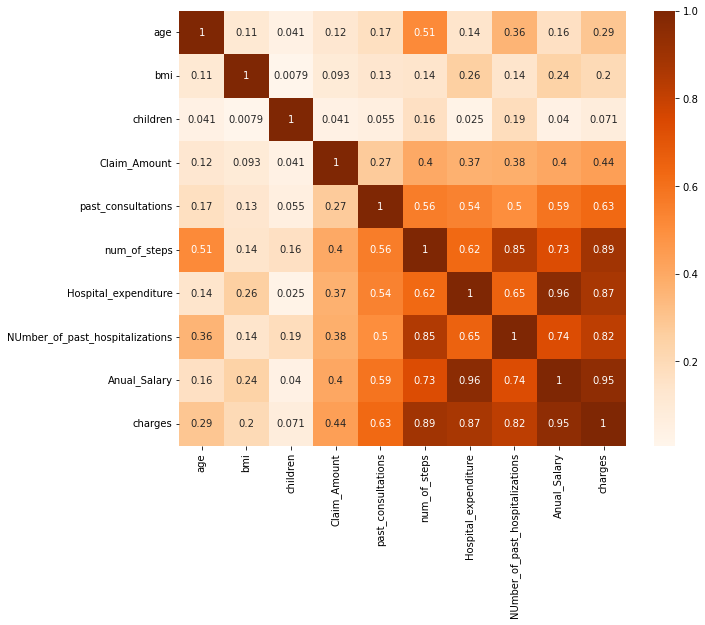

In [34]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True,cmap = "Oranges")

In [35]:
#From the above graph we can see a lot of intresting corelating fetures
# 1) when the salary increased the charges increases this might me the case that when the  salary increases their 
# amount of spending increases so they might consult in a private hospital where the charges are high and the ones whos salary 
# is low will be consulting in a cheaper hospital

# 2)And we can see that when the Age increases the charges also inceases 

# 3)Then we can see that when the when the number of past hospitalization, hospital expenditure and past consultaion incrases 
#   the charges also incrases
    
# 4) And finaly we can see that there is slight postive corelation between the number of children and charges 
#    that is claim amount increases for that perticular person if hes having a more number of children

In [36]:
# Lets visulatize the above

Text(0.5, 1.0, 'charges vs Anual_Salary')

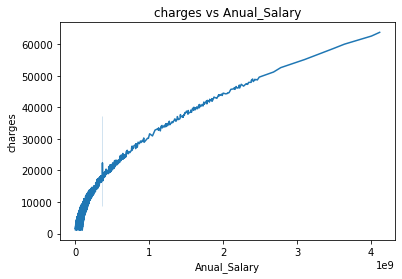

In [37]:
sns.lineplot(x = "Anual_Salary",y = "charges",data = df)
plt.title("charges vs Anual_Salary")

Text(0.5, 1.0, 'charges vs Age')

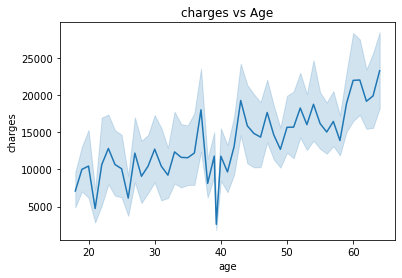

In [38]:
sns.lineplot(x = "age",y = "charges",data = df)
plt.title("charges vs Age")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   NUmber_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

Text(0.5, 1.0, 'Hospital_expenditure vs NUmber_of_past_hospitalizations')

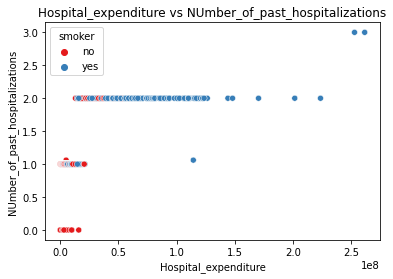

In [40]:
sns.scatterplot(x = "Hospital_expenditure",y = "NUmber_of_past_hospitalizations",data = df,hue = "smoker",palette = "Set1")
plt.title("Hospital_expenditure vs NUmber_of_past_hospitalizations")

In [41]:
#In the above graph we can see that if a person is smoker his hospital expenditure and number of past hospitalisation increases

Text(0.5, 1.0, 'sex vs charges')

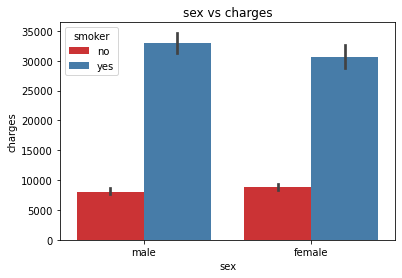

In [42]:
sns.barplot(x = "sex",y = "charges",data = df,hue = "smoker",palette = "Set1")
plt.title("sex vs charges")

Text(0.5, 1.0, 'sex vs charges')

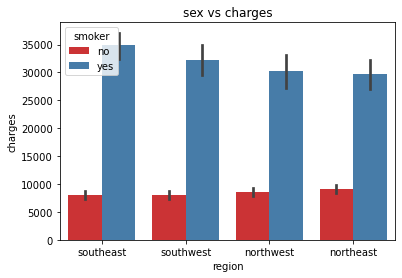

In [43]:
sns.barplot(x = "region",y = "charges",data = df,hue = "smoker",palette = "Set1")
plt.title("sex vs charges")

In [44]:
# variance_inflation_factor

# Variance Inflation Factor (VIF) is a measure used to quantify the degree of multicollinearity in a set 
# of predictor variables used in a regression analysis. In statistics, multicollinearity occurs when two or
# more predictor variables in a regression model are highly correlated with each other, making it difficult
# to determine their individual effects on the response variable.

# The VIF measures how much the variance of the estimated regression coefficient is increased due to
# multicollinearity in the predictor variables. It is calculated as the ratio of the variance of the
# estimated coefficient in a regression model that includes all the predictor variables to the variance
# of the estimated coefficient in a model that includes only the predictor variable of interest.
# A VIF value of 1 indicates no multicollinearity, while values greater than 1 indicate increasing
# levels of multicollinearity. Generally, a VIF value of 5 or higher indicates that multicollinearity 
# may be a problem and requires further investigation.

In [45]:
col1 = []
for i in col:
    if ((df[i].dtype != 'object') & (i!= "charges")):
        col1.append(i)
        

In [46]:
col1

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [47]:
x= df[col1]

In [48]:
x.head(2)

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19


In [49]:
x.values

array([[1.80000000e+01, 2.32100000e+01, 0.00000000e+00, ...,
        4.72092099e+06, 0.00000000e+00, 5.57849700e+07],
       [1.80000000e+01, 3.01400000e+01, 0.00000000e+00, ...,
        4.32983168e+06, 0.00000000e+00, 1.37008852e+07],
       [1.80000000e+01, 3.33300000e+01, 0.00000000e+00, ...,
        6.88486077e+06, 0.00000000e+00, 7.35231073e+07],
       ...,
       [5.20000000e+01, 3.44850000e+01, 3.00000000e+00, ...,
        2.23644981e+08, 2.00000000e+00, 3.64080668e+09],
       [4.50000000e+01, 3.03600000e+01, 0.00000000e+00, ...,
        2.52892383e+08, 3.00000000e+00, 4.00635850e+09],
       [5.40000000e+01, 4.74100000e+01, 0.00000000e+00, ...,
        2.61631699e+08, 3.00000000e+00, 4.11719664e+09]])

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
VIF = pd.DataFrame()
VIF["Features"] = col1
VIF["VIF_value"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [52]:
VIF

,Features,VIF_value
0,age,11.972236
1,bmi,26.048801
2,children,1.950345
3,Claim_Amount,6.914689
4,past_consultations,8.359097
5,num_of_steps,60.081218
6,Hospital_expenditure,18.912264
7,NUmber_of_past_hospitalizations,15.974474
8,Anual_Salary,25.322480


In [53]:
col1.remove("num_of_steps")
x = x.drop(columns = ["num_of_steps"])

In [54]:
VIF = pd.DataFrame()
VIF["Features"] = col1
VIF["VIF_value"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF_value
0,age,10.155052
1,bmi,11.727204
2,children,1.934095
3,Claim_Amount,6.372297
4,past_consultations,7.564379
5,Hospital_expenditure,18.779195
6,NUmber_of_past_hospitalizations,13.870372
7,Anual_Salary,25.300524


In [55]:
col1.remove("Anual_Salary")
x = x.drop(columns = ["Anual_Salary"])

In [56]:
VIF = pd.DataFrame()
VIF["Features"] = col1
VIF["VIF_value"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF_value
0,age,9.911802
1,bmi,11.146550
2,children,1.918421
3,Claim_Amount,6.360830
4,past_consultations,7.338981
5,Hospital_expenditure,2.551578
6,NUmber_of_past_hospitalizations,11.057620


In [57]:
col1.remove("bmi")
x = x.drop(columns = ["bmi"])

In [58]:
VIF = pd.DataFrame()
VIF["Features"] = col1
VIF["VIF_value"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF_value
0,age,7.510410
1,children,1.891269
2,Claim_Amount,5.659160
3,past_consultations,6.709812
4,Hospital_expenditure,2.521156
5,NUmber_of_past_hospitalizations,11.038515


In [59]:
col1.remove("NUmber_of_past_hospitalizations")
x = x.drop(columns = ["NUmber_of_past_hospitalizations"])

In [60]:
VIF = pd.DataFrame()
VIF["Features"] = col1
VIF["VIF_value"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF_value
0,age,5.810092
1,children,1.783877
2,Claim_Amount,5.350400
3,past_consultations,6.291554
4,Hospital_expenditure,1.889508


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   NUmber_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [62]:
x["sex"] = df["sex"]

In [63]:
x["smoker"] = df["smoker"]

In [64]:
x.head()

,age,children,Claim_Amount,past_consultations,Hospital_expenditure,sex,smoker
0,18.0,0.0,29087.54313,17.0,4720920.992,male,no
1,18.0,0.0,39053.67437,7.0,4329831.676,male,no
2,18.0,0.0,39023.62759,19.0,6884860.774,male,no
3,18.0,0.0,28185.39332,11.0,4274773.550,male,no
4,18.0,0.0,14697.85941,16.0,3787293.921,male,no


In [65]:
y = pd.DataFrame()

In [66]:
y["charges"] = df["charges"]

In [67]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
col = list(x.columns)

In [70]:
le = LabelEncoder()
for i in col:
    if x[i].dtype == "object":
        x[i] = le.fit_transform(x[i])

In [71]:
x.head()

,age,children,Claim_Amount,past_consultations,Hospital_expenditure,sex,smoker
0,18.0,0.0,29087.54313,17.0,4720920.992,1,0
1,18.0,0.0,39053.67437,7.0,4329831.676,1,0
2,18.0,0.0,39023.62759,19.0,6884860.774,1,0
3,18.0,0.0,28185.39332,11.0,4274773.550,1,0
4,18.0,0.0,14697.85941,16.0,3787293.921,1,0


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state = 47)

In [74]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1204, 7)
(134, 7)
(1204, 1)
(134, 1)


In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

In [77]:
from sklearn.metrics import r2_score

In [78]:
accuracy = r2_score(y_pred,y_test)

In [79]:
accuracy*100

86.98296124258114

In [80]:
# so thus we have got an accuracy score of 86%